In [1]:
from keras.layers import Input, Lambda, Dense, Flatten

from keras.models import Model

from keras.applications.vgg16 import VGG16

from keras.applications.vgg16 import preprocess_input

from keras.preprocessing import image

from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential

import numpy as np
import seaborn as sns
from glob import glob

import matplotlib.pyplot as plt
import keras

Using TensorFlow backend.


In [2]:
# re-size all the images to this

IMAGE_SIZE = [224, 224]
train_path = 'C:/Users/nsida/pneumonia/train'

valid_path = 'C:/Users/nsida/pnemonia/test'

In [3]:
train_path

'C:/Users/nsida/pneumonia/train'

In [4]:
# add preprocessing layer to the front of VGG

vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
# don't train existing weights

for layer in vgg.layers:

  layer.trainable = False

In [6]:
# useful for getting number of classes

folders = glob('C:/Users/nsida/pneumonia/train/*')

In [10]:
# our layers 

x = Flatten()(vgg.output)

x = Dense(100, activation='relu')(x)

prediction = Dense(len(folders), activation='softmax')(x)

In [11]:
# create a model object

model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [12]:
# tell the model what cost and optimization method to use

model.compile(

  loss='categorical_crossentropy',

  optimizer='adam',

  metrics=['accuracy']
)

In [13]:
from keras.preprocessing.image import ImageDataGenerator



train_datagen = ImageDataGenerator(rescale = 1./255,

                                   shear_range = 0.2,

                                   zoom_range = 0.2,

                                   horizontal_flip = True)



test_datagen = ImageDataGenerator(rescale = 1./255)



training_set = train_datagen.flow_from_directory('C:/Users/nsida/pneumonia/train',

                                                 target_size = (224, 224),

                                                 batch_size = 32,

                                                 class_mode = 'categorical')



test_set = test_datagen.flow_from_directory('C:/Users/nsida/pneumonia/test',

                                            target_size = (224, 224),

                                            batch_size = 32,

                                            class_mode = 'categorical')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [14]:
# fit the model

r = model.fit_generator(

  training_set,

  validation_data=test_set,

  epochs=5,

  steps_per_epoch=len(training_set),

  validation_steps=len(test_set))

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
163/163 [==============================] - 134s 819ms/step - loss: 0.2877 - acc: 0.9074 - val_loss: 0.2960 - val_acc: 0.9151
Epoch 2/5
163/163 [==============================] - 116s 711ms/step - loss: 0.1074 - acc: 0.9603 - val_loss: 0.4600 - val_acc: 0.8237
Epoch 3/5
163/163 [==============================] - 117s 717ms/step - loss: 0.1135 - acc: 0.9601 - val_loss: 0.2398 - val_acc: 0.9231
Epoch 4/5
163/163 [==============================] - 119s 728ms/step - loss: 0.0931 - acc: 0.9689 - val_loss: 0.2393 - val_acc: 0.9199
Epoch 5/5
163/163 [==============================] - 117s 721ms/step - loss: 0.0769 - acc: 0.9716 - val_loss: 0.6377 - val_acc: 0.8478


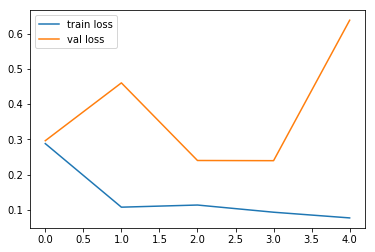

<Figure size 432x288 with 0 Axes>

In [15]:
# loss

plt.plot(r.history['loss'], label='train loss')

plt.plot(r.history['val_loss'], label='val loss')

plt.legend()

plt.show()

plt.savefig('LossVal_loss')

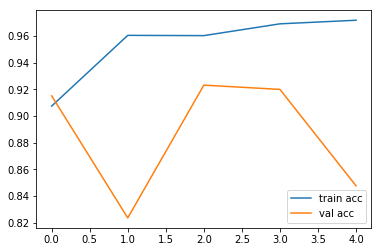

<Figure size 432x288 with 0 Axes>

In [16]:
# accuracies

plt.plot(r.history['acc'], label='train acc')

plt.plot(r.history['val_acc'], label='val acc')

plt.legend()

plt.show()

plt.savefig('AccVal_acc')



import tensorflow as tf



from keras.models import load_model



model.save('model_vgg19.h5')

